### Problem Statement:
The dataset contains grades scored by students throughout their university
tenure in various courses and their CGPA calculated based on their grades

Columns Description -- total 43 columns

- Seat No: The enrolled number of candidates that took the exams

- CGPA: The cumulative GPA based on the four-year total grade progress of each candidate. CGPA is a Final Marks -- provided to student.
- All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the candidates took exam

### Predict 
CGPA of a student based on different grades in four years.

### Libraries

In [8]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
#The line %matplotlib inline is a special command used in Jupyter Notebooks or JupyterLab environments. It tells the notebook interface to display matplotlib plots directly within the notebook itself, rather than in a separate window or file.
%matplotlib inline

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

In [9]:
#Import the Data

data=pd.read_csv(r"C:\Users\sharm\Downloads\Grades.csv")

In [10]:
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [11]:
data.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


### EDA

In [17]:
data.shape

(571, 43)

In [19]:
for column in data.columns[1:-1]:  # Skip 'Seat No' and 'CGPA'
    print(f"Unique values in {column}:")
    print(data[column].unique())
    print("-" * 30)

Unique values in PH-121:
['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']
------------------------------
Unique values in HS-101:
['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']
------------------------------
Unique values in CY-105:
['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' nan 'WU' 'A+' 'F']
------------------------------
Unique values in HS-105/12:
['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' nan 'WU' 'A+' 'F']
------------------------------
Unique values in MT-111:
['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' nan 'A+' 'F' 'WU']
------------------------------
Unique values in CS-105:
['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D']
------------------------------
Unique values in CS-106:
['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' nan 'A+' 'F' 'WU']
------------------------------
Unique values in EL-102:
['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' nan 'A+' 'WU' 'F']
------------------------------
Unique values in EE-119:
['B-' 'D+' 'A-' 'D' 'A

In [21]:
print(data.isna().sum())

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64


In [23]:
#there exists null values

### Statistical Analysis

In [26]:
data.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


As we have categorical column(of all subjects) we need to convert into numeric data using encoding method.

### Handle missing data

In [30]:
# Handling Missing Values in Grades Dataset
for column in data.columns[1:-1]:  # Exclude Seat No. and CGPA
    if data[column].dtype == 'object':  # For categorical columns
        data[column].fillna(data[column].mode()[0], inplace=True)

In [32]:
print(data.isna().sum())

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64


In [34]:
#no null values present 

In [36]:
data=data.drop('Seat No.',axis=1)

### Encoding

In [40]:
# Encode categorical columns (e.g., one-hot encoding or label encoding)

#Creates a copy of the original DataFrame
data1 = data.copy()

#filters columns in the DataFrame that have a datatype of object=strings
for col in data.select_dtypes(include='object').columns:
    # data[col].astype('category')==Converts the column to a category datatype.
    # .cat.codes== Converts each category in the column into a numeric code (label encoding)
    data1[col] = data1[col].astype('category').cat.codes  # Label encoding

### Visualize the data

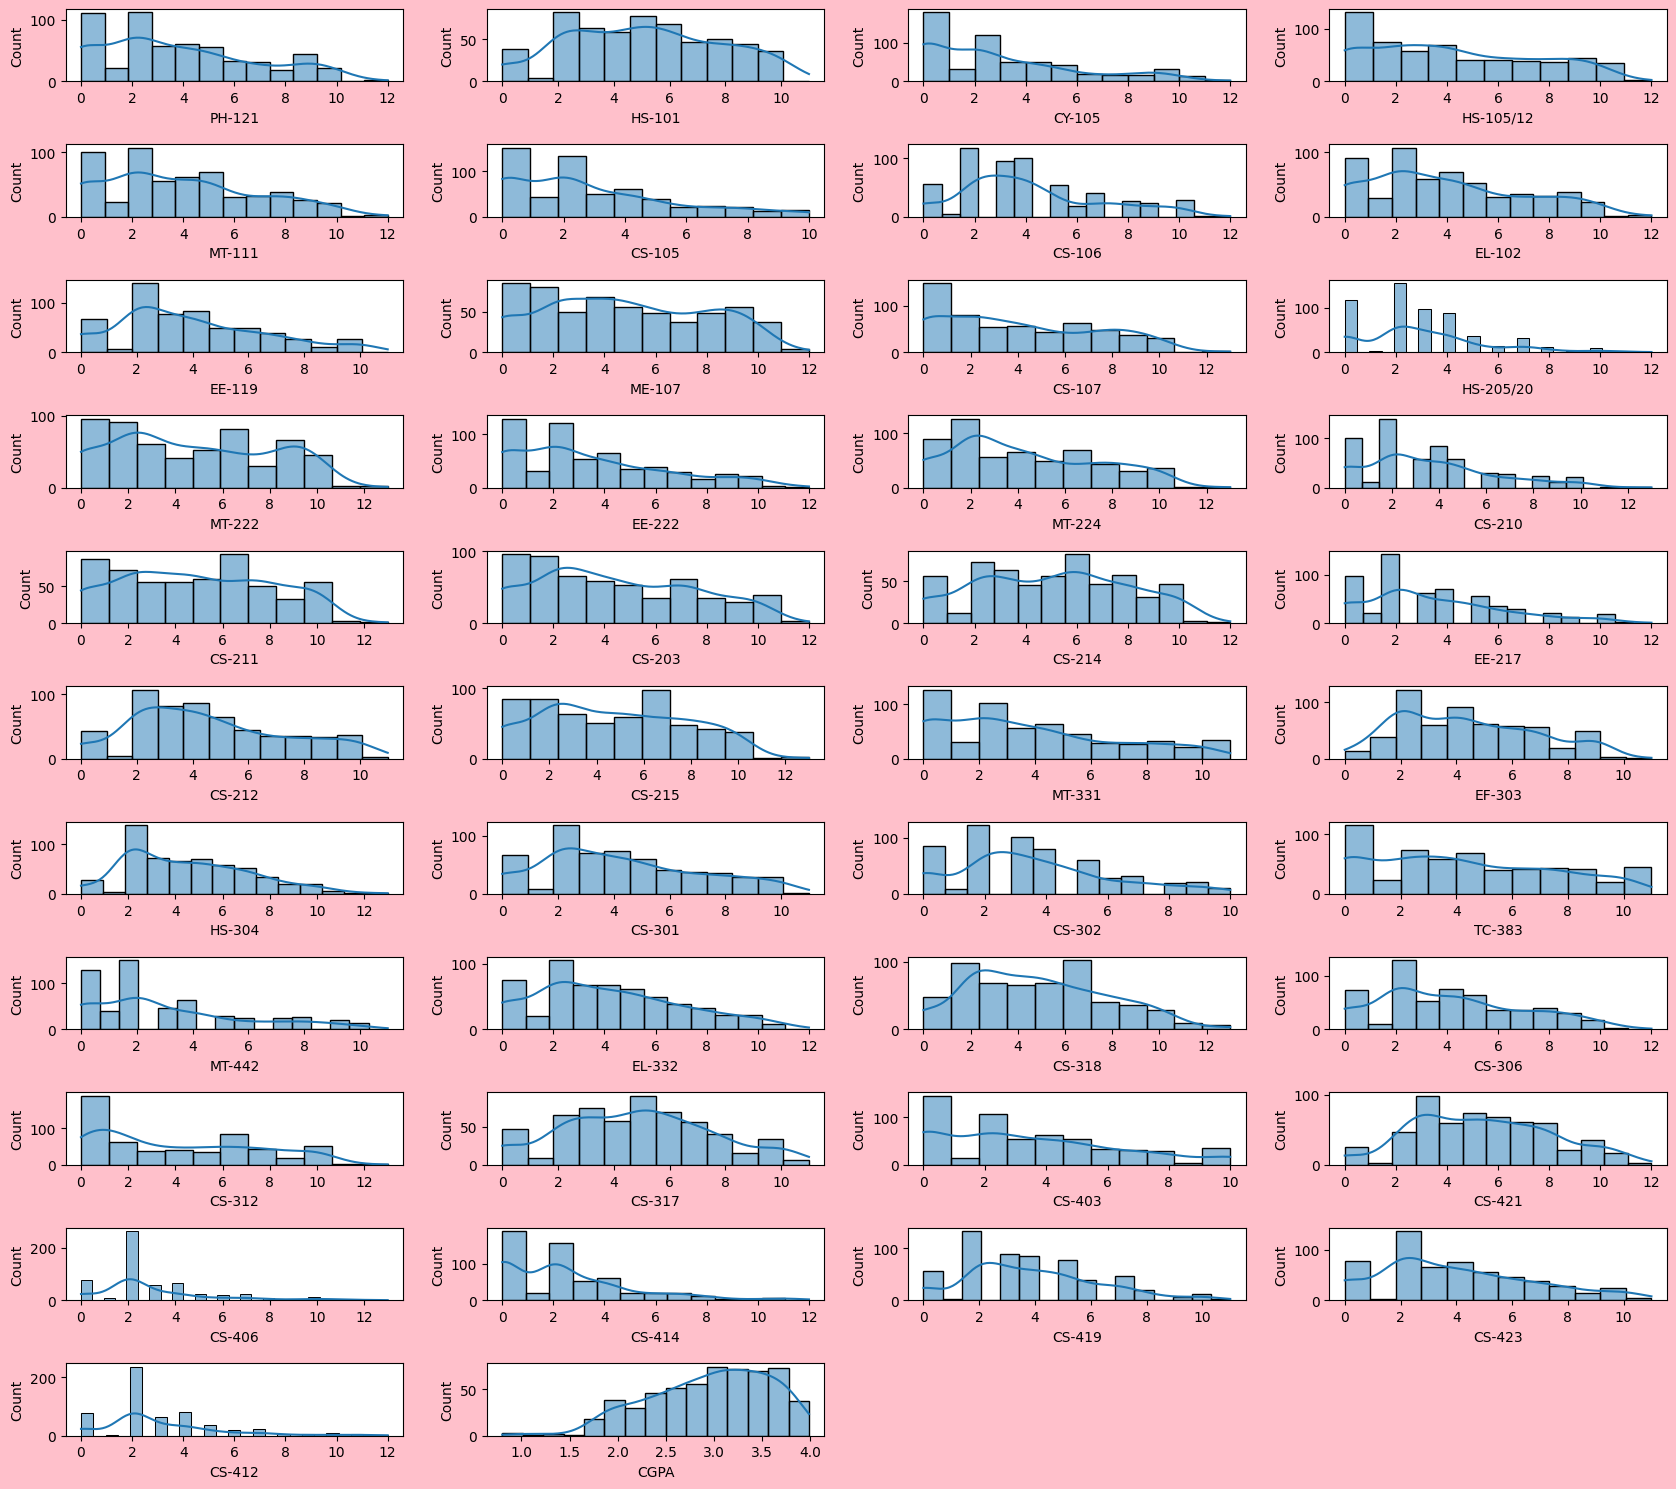

In [44]:
plt.figure(figsize=(17,15),facecolor='pink')
plotnumber=1
for column in data1:
  if plotnumber<=43:
        ax=plt.subplot(11,4,plotnumber)
        sns.histplot(data1[column], kde=True)
        plt.xlabel(column,fontsize=10)
  plotnumber+=1
plt.tight_layout()
plt.show()

### Train Test Split
--> Training is for learning Purpose

--> Test is for checking Purpose

In [54]:
# Let's prepare the data for modeling by removing the 'Alcohol_content' feature from the predictors and setting 'quality' as the target variable.
# Define features (X) and target (y)
x = data1.drop('CGPA', axis=1)  # All columns except 'charges'
y = data1['CGPA']

In [56]:
#Lets split the data into a train test spli
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=94255)

In [58]:
# Create the scaler
scaler = StandardScaler()

# Fit the scaler on the data and transform it
x_trainscaled = scaler.fit_transform(xtrain)
x_testscaled = scaler.transform(xtest)

### The Variance Inflation Factor (VIF)
It is used to detect multicollinearity in a regression model. Multicollinearity occurs when two or more independent variables are highly correlated, which can affect the accuracy of the regression coefficients.

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_trainscaled,i) for i in range (x_trainscaled.shape[1])]

vif['Features']=x.columns
#Lets Check the Values 

vif

,vif,Features
0,2.915304,PH-121
1,1.884026,HS-101
2,2.611144,CY-105
3,2.394695,HS-105/12
4,2.733194,MT-111
5,2.389086,CS-105
6,2.008570,CS-106
7,2.253071,EL-102
8,2.355195,EE-119
9,2.317713,ME-107


VIF = 1: No correlation with other variables (no multicollinearity).

1 < VIF < 5: Moderate correlation with other variables. It’s usually acceptable.

### Model Performance

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
df=DecisionTreeRegressor(random_state=42)

In [77]:
#train the model
df.fit(x_trainscaled,ytrain)

DecisionTreeRegressor(random_state=42)

In [79]:
#prediction

In [81]:
ypred_train=df.predict(x_trainscaled)

In [83]:
ypred_test=df.predict(x_testscaled)

In [85]:
# Evaluate Decision Tree
print("================== Decision Tree ==================")
print("Training MSE:", mean_squared_error(ytrain, ypred_train))
print("Testing MSE:", mean_squared_error(ytest, ypred_test))
print("R2 Score:", r2_score(ytest, ypred_test))

================== Decision Tree ==================
Training MSE: 0.0
Testing MSE: 0.05970712587412586
R2 Score: 0.8358879970297466


Training MSE: 0.0

This often indicates the model is overfitting to the training data, capturing noise or irrelevant patterns

### Cross Validation

In [89]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [91]:
# Initialize the Decision Tree Regressor

#Pruning the Decision Tree: Limit the depth of the tree (max_depth) 
dt = DecisionTreeRegressor(max_depth=5, random_state=42)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(dt, x, y, scoring='neg_mean_squared_error', cv=5)

# Convert negative MSE to positive and calculate mean and standard deviation
mse_scores = -cv_scores  # cross_val_score returns negative MSE
mean_mse = np.mean(mse_scores)  # Use NumPy for mean calculation
std_mse = np.std(mse_scores)    # Use NumPy for standard deviation calculation

# Print results
print("================== Cross-Validation Results ==================")
print(f"Mean MSE: {mean_mse:.4f}")
print(f"Standard Deviation of MSE: {std_mse:.4f}")

================== Cross-Validation Results ==================
Mean MSE: 0.0891
Standard Deviation of MSE: 0.0268


### HyperParameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
# Define the model
dt = DecisionTreeRegressor(random_state=42)

In [99]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 20, 50],                  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                       # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2'],      # Number of features to consider when looking for the best split
    'criterion': ['mse', 'friedman_mse', 'mae'],         # The function to measure the quality of a split
}

In [103]:
# Set up GridSearchCV
grid_search=GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [107]:
# Fit the grid search to the training data
grid_search.fit(x_trainscaled, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 5, 10, 20, 50],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [113]:
best_params=grid_search.best_params_

In [115]:
best_params

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [117]:
#best model with best parameters
best_model=grid_search.best_estimator_

In [119]:
best_model

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='sqrt', min_samples_split=10,
                      random_state=42)

In [127]:
#predicts
ypred=best_model.predict(x_testscaled)

In [129]:
print(ypred)

[2.245      3.86866667 3.248375   3.4396     3.40866667 2.1395
 2.70522222 2.652      3.4396     2.70522222 1.16366667 3.1864
 1.9975     3.46688889 3.81925    3.66628571 2.415      3.42666667
 2.49785714 3.02614286 1.97514286 1.16366667 1.854      2.0835
 3.19314286 3.15714286 3.66628571 2.7228     1.93385714 3.14055556
 3.8894     2.6764     3.42666667 2.6764     3.56411111 3.15714286
 3.769      3.189      3.349125   2.379      3.17166667 2.9445
 3.66628571 3.56411111 2.7228     2.9445     3.203875   3.22
 2.49785714 3.42666667 3.15714286 2.3494     2.9142     3.4105
 2.90633333 2.0835     3.02614286 2.458      3.7036     3.569
 3.569      2.415      3.66628571 3.66628571 3.114      3.19314286
 1.8568     2.49785714 2.70522222 3.19314286 3.17166667 3.86866667
 3.7036     2.56866667 3.569      3.46688889 3.46688889 3.46688889
 2.79322222 3.42666667 3.248375   2.49785714 3.4396     3.203875
 2.084      1.7962     3.46688889 2.652      3.1864     2.379
 2.837      3.349125   3.672375  

### Evaluation

In [138]:
# Evaluate the model's performance
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)
print("Mean Squared Error on Test Set:", mse)
print("Root Mean Squared Error on Test Set:", rmse)
print("R2 Score:", r2)

Mean Squared Error on Test Set: 0.07485561749037448
Root Mean Squared Error on Test Set: 0.27359754657228647
R2 Score: 0.7942506000737832
